# k-Nearest Neighbor

## Results

|   Bin size   | Memory usage | Prediction time | Accuracy|
|:------------:|:------------:|:---------------:|:-------:|
| (8, 8, 8)    |   3.84 [MB]  |   0.00691 [s]   |  93.9 % |
| (16, 16, 16) |  30.72 [MB]  |    0.0553 [s]   |  94.1 % |
| (32, 32, 32) | 245.76 [MB]  |     0.353 [s]   |  91.7 % |

## Code

### Setup stuff

In [1]:
###### IMPORTS ######
import os
import glob
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from knn_classifier import kNearestNeighbor

from util import time_function, extract_hist, image_to_feature_vector, convert_label_to_number
from util import cross_val, print_info, plot_image_samples, multiband_threshold, smooth

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
###### GLOBAL VARIABLES ######
# Labels
BACKGROUND = 0
POTATO = 1
CARROT = 2
CAT_SAL = 3
CAT_BEEF = 4
BUN = 5
ARM = 6
KETCHUP = 7

# Background mask
BGD_MASK = cv2.imread('../preprocessing/bgd_mask.jpg', cv2.IMREAD_COLOR)

# Average background image
AVG_BGD_MASK = cv2.imread('../preprocessing/avg_background.jpg', cv2.IMREAD_COLOR)

# Test directories
BGD_TEST_DIR = glob.glob('../dataset3/res_crop/test/background/*.jpg')
POTATO_TEST_DIR = glob.glob('../dataset3/res_crop/test/potato/*.jpg')
CARROT_TEST_DIR = glob.glob('../dataset3/res_crop/test/carrots/*jpg')
CAT_SAL_TEST_DIR = glob.glob('../dataset3/res_crop/test/catfood_salmon/*.jpg')
CAT_BEEF_TEST_DIR = glob.glob('../dataset3/res_crop/test/catfood_beef/*.jpg')
BUN_TEST_DIR = glob.glob('../dataset3/res_crop/test/bun/*.jpg')
ARM_TEST_DIR = glob.glob('../dataset3/res_crop/test/arm/*.jpg')
KETCHUP_TEST_DIR = glob.glob('../dataset3/res_crop/test/ketchup/*.jpg')

# Train directories
BGD_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/background/*.jpg')
POTATO_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/potato/*.jpg')
CARROT_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/carrots/*jpg')
CAT_SAL_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/catfood_salmon/*.jpg')
CAT_BEEF_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/catfood_beef/*.jpg')
BUN_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/bun/*.jpg')
ARM_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/arm/*.jpg')
KETCHUP_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/ketchup/*.jpg')

### Cropped images histogram
- Gaussian smoothed
- Multiband thresholding
- Bin size = (8, 8, 8)


Sample of images from dataset:



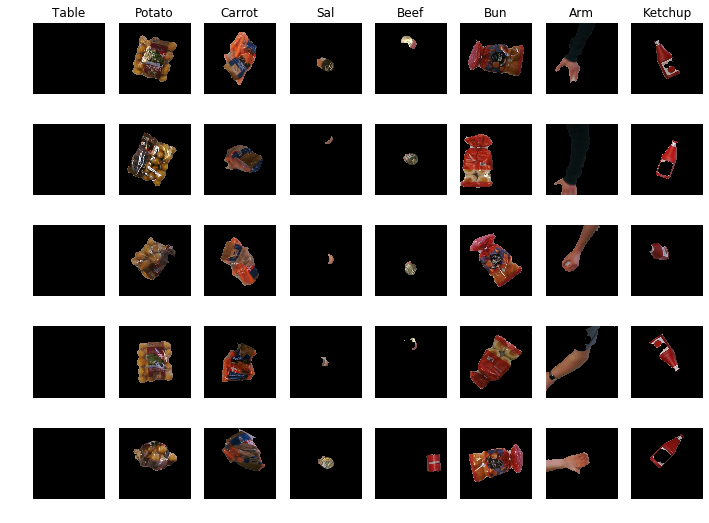

In [3]:
def import_data(X, y, path, show_img):
    """ Imports data """

    image_paths = list(paths.list_images(path))

    if show_img is True:
        images = []

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = image_path.split(os.path.sep)[-1].split('_')[0]
        label = convert_label_to_number(label)

        # Gaussian smoothing
        img = smooth(img, size=(5, 5))

        # Multiband thresholding
        img = multiband_threshold(img, bins=(8, 8, 8))

        # Extract histogram
        hist = extract_hist(img)

        X.append(hist)
        y.append(label)

        if show_img is True:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)

    if show_img is True:
        return images

###### IMPORT TRAIN DATA ######
X_train = []
y_train = []
path = 'cropped_images/train/'
import_data(X_train, y_train, path, False)

###### IMPORT TEST DATA ######
X_test = []
y_test = []
path = 'cropped_images/test/'
images = import_data(X_test, y_test, path, True)

# Display samples of images from dataset
print('\nSample of images from dataset:\n')
plot_image_samples(images, y_test)

del images


Information:

Train matrix: 3.84 MB
Test matrix: 0.966656 MB
Train data shape: (1875, 512)
Tain labels shape: (1875,)
Test data shape: (472, 512)
Test labels shape: (472,)
Distance shape: (472, 1875)


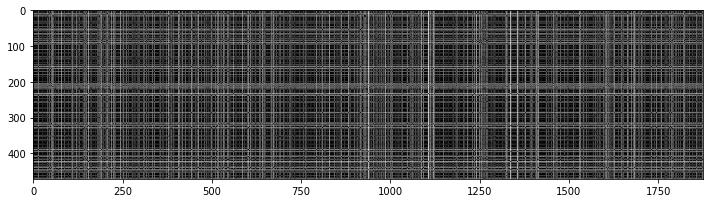

Average time performance: 0.006914599736531576 seconds


In [4]:
# Informatoin
print('\nInformation:\n')
X_train, y_train, X_test, y_test = print_info(X_train, y_train, X_test, y_test)


Cross-validation:



/mnt/sdb1/Robtek/6semester/Bachelorproject/BSc-PRO/knn/knn_classifier.py:47: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared_dist)


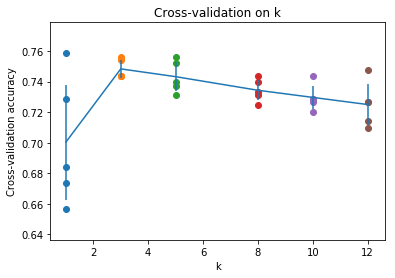

In [5]:
# Cross-validation
print('\nCross-validation:\n')

num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12]

X_train_hist_folds = []
X_train_pixel_folds = []
y_train_folds = []

# Split training data into folds
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))

cross_val(k_choices, num_folds, X_train_folds, y_train_folds, X_test.shape[0])

In [6]:
# Best value of k
print('\nkNN with the best value of k:')
best_k = 3

classifier = kNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('\nGot %d / %d correct' % (num_correct, X_test.shape[0]))
print('Accuracy: %f' % accuracy)


kNN with the best value of k:

Got 443 / 472 correct
Accuracy: 0.938559


In [7]:
# Remove X_train, y_train, X_test, y_test from memory
del X_train
del y_train
del X_test
del y_test

### Cropped images histogram
- Gaussian smoothed
- Multiband thresholding
- Bin size = (16, 16, 16)

In [8]:
def import_data(X, y, path, show_img):
    """ Imports data """

    image_paths = list(paths.list_images(path))

    if show_img is True:
        images = []

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = image_path.split(os.path.sep)[-1].split('_')[0]
        label = convert_label_to_number(label)

        # Gaussian smoothing
        img = smooth(img, size=(5, 5))

        # Multiband thresholding
        img = multiband_threshold(img)

        # Extract histogram
        hist = extract_hist(img, bins=(16, 16, 16))

        X.append(hist)
        y.append(label)

        if show_img is True:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)

    if show_img is True:
        return images

###### IMPORT TRAIN DATA ######
X_train = []
y_train = []
path = 'cropped_images/train/'
import_data(X_train, y_train, path, False)

###### IMPORT TEST DATA ######
X_test = []
y_test = []
path = 'cropped_images/test/'
import_data(X_test, y_test, path, False)


Information:

Train matrix: 30.72 MB
Test matrix: 7.733248 MB
Train data shape: (1875, 4096)
Tain labels shape: (1875,)
Test data shape: (472, 4096)
Test labels shape: (472,)
Distance shape: (472, 1875)


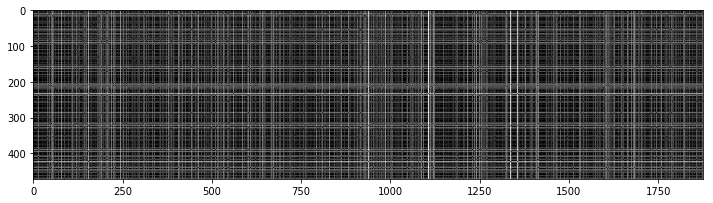

Average time performance: 0.05527194341023763 seconds


In [9]:
# Informatoin
print('\nInformation:\n')
X_train, y_train, X_test, y_test = print_info(X_train, y_train, X_test, y_test)


Cross-validation:



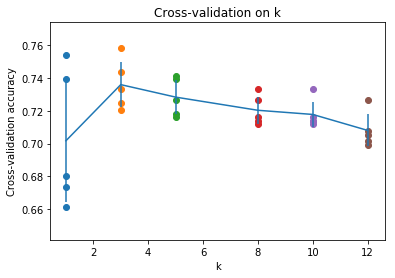

In [10]:
# Cross-validation
print('\nCross-validation:\n')

num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12]

X_train_hist_folds = []
X_train_pixel_folds = []
y_train_folds = []

# Split training data into folds
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))

cross_val(k_choices, num_folds, X_train_folds, y_train_folds, X_test.shape[0])

In [11]:
# Best value of k
print('\nkNN with the best value of k:')
best_k = 3

classifier = kNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('\nGot %d / %d correct' % (num_correct, X_test.shape[0]))
print('Accuracy: %f' % accuracy)


kNN with the best value of k:

Got 444 / 472 correct
Accuracy: 0.940678


In [12]:
# Remove X_train, y_train, X_test, y_test from memory
del X_train
del y_train
del X_test
del y_test

### Cropped images histogram
- Gaussian smoothing
- Multiband thresholding
- Bin size = (32, 32, 32)

In [13]:
def import_data(X, y, path, show_img):
    """ Imports data """

    image_paths = list(paths.list_images(path))

    if show_img is True:
        images = []

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = image_path.split(os.path.sep)[-1].split('_')[0]
        label = convert_label_to_number(label)

        # Gaussian smoothing
        img = smooth(img, size=(5, 5))

        # Multiband thresholding
        img = multiband_threshold(img)

        # Extract histogram
        hist = extract_hist(img, bins=(32, 32, 32))

        X.append(hist)
        y.append(label)

        if show_img is True:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)

    if show_img is True:
        return images

###### IMPORT TRAIN DATA ######
X_train = []
y_train = []
path = 'cropped_images/train/'
import_data(X_train, y_train, path, False)

###### IMPORT TEST DATA ######
X_test = []
y_test = []
path = 'cropped_images/test/'
import_data(X_test, y_test, path, False)


Information:

Train matrix: 245.76 MB
Test matrix: 61.865984 MB
Train data shape: (1875, 32768)
Tain labels shape: (1875,)
Test data shape: (472, 32768)
Test labels shape: (472,)
Distance shape: (472, 1875)


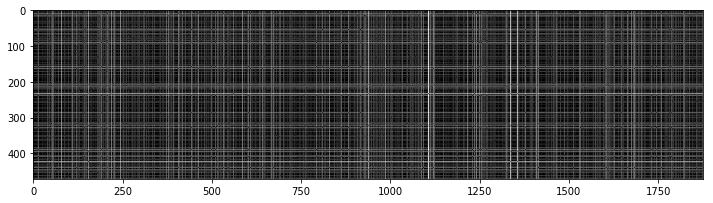

Average time performance: 0.35285605589548746 seconds


In [14]:
# Informatoin
print('\nInformation:\n')
X_train, y_train, X_test, y_test = print_info(X_train, y_train, X_test, y_test)


Cross-validation:



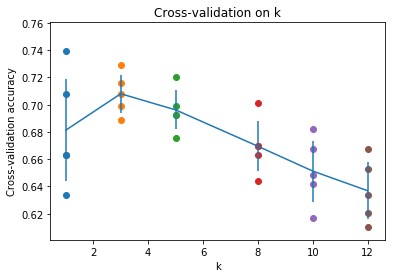

In [15]:
# Cross-validation
print('\nCross-validation:\n')

num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12]

X_train_hist_folds = []
X_train_pixel_folds = []
y_train_folds = []

# Split training data into folds
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))

cross_val(k_choices, num_folds, X_train_folds, y_train_folds, X_test.shape[0])

In [16]:
# Best value of k
print('\nkNN with the best value of k:')
best_k = 3

classifier = kNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('\nGot %d / %d correct' % (num_correct, X_test.shape[0]))
print('Accuracy: %f' % accuracy)


kNN with the best value of k:

Got 433 / 472 correct
Accuracy: 0.917373


In [17]:
# Remove X_train, y_train, X_test, y_test from memory
del X_train
del y_train
del X_test
del y_test